<a href="https://colab.research.google.com/github/valmyr/CIRCUITOS-I/blob/main/Exerc_02_circuitos_i_3_unidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
#
import sys
!git clone https://github.com/edsonportosilva/ElectricCircuits.git
sys.path.insert(0, '/content/ElectricCircuits/Jupyter notebooks/')

fatal: destination path 'ElectricCircuits' already exists and is not an empty directory.


In [297]:
import sympy as sp
import numpy as np
from matplotlib.pyplot import plot as plt
from utils import round_expr, symdisp, symplot
from sympy.polys.partfrac import apart
bt = np.arange(-0.1,1,(10**-3)/10)

In [298]:
sp.init_printing()
# transformada de Laplace
def L(f,t,s):
    return sp.laplace_transform(f, t, s, noconds=True)

# transformada inversa de Laplace
def invL(F,s,t):
    return sp.re(sp.inverse_laplace_transform(F, s, t, noconds=True))

# funções para auxílio na expansão em frações parciais
def adjustCoeff(expr):    
    coeff = expr.as_numer_denom()
    c0 = sp.poly(coeff[1].cancel()).coeffs()[0]
    
    return (coeff[0].cancel()/c0)/(coeff[1].cancel()/c0)

def partFrac(expr, Ndigits):
    expr = expr.cancel()
    expr = apart(adjustCoeff(expr), s, full=True).doit()
    
    return sp.N(expr, Ndigits)


In [299]:
matricula = [1,1,0]
R1 = (matricula[0]+1)

In [300]:
matricula[0]

In [301]:
I1,IL,IC,Vx,Vx_,Vx__,Vc_,Vc__,V1,V2,s,t = sp.symbols('I_1,I_L,I_C,V_x,Vx_,V_x_,V_c_,V__c_,V_1,V_2,s,t')

I1 = (V1 - s*Vx)/(0.5*(s**2))
IL = Vx/(2*R1+0.5*s)
IC = (s*Vx-V2)/4000

In [302]:
Eq = sp.Eq(I1,IL+IC)

In [303]:
#Contribuição de V1
sol = sp.solve(Eq.subs({V1:20,V2:0}),Vx,dict=True)[0]
Vx_ = sol[Vx]
IL_ = IL.subs({Vx:Vx_})
Vc_ = (IC*(4000/s)).subs({Vx:Vx_,V1:20,V2:0}).simplify()

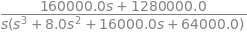

In [304]:
Vc_

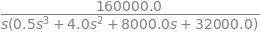

In [305]:
IL_.simplify()

In [306]:
#Contribuição de V2
sol = sp.solve(Eq.subs({V1:0,V2:10}),Vx,dict=True)[0]
Vx__ = sol[Vx]
IL__ = IL.subs({Vx:Vx__,V1:0,V2:10}).simplify()
Vc__ = (IC*(4000/s)).subs({Vx:Vx__,V1:0,V2:10}).simplify()

In [307]:
symdisp("Vx_{'}(s) = ",Vx_,'Vs')
symdisp("Vx_{''}(s) = ",Vx__,'Vs')
symdisp('Vx(s) = ',(Vx__+Vx_).expand().simplify(),'Vs')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

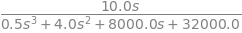

In [308]:
IL__


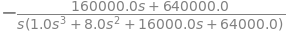

In [309]:
Vc__

In [310]:
#Assim Vc = Vc_+Vc__ é IL = IL_+IL__
VC = (Vc_ + Vc__).simplify()
IL = (IL_+IL__).simplify()

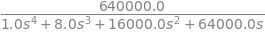

In [311]:
VC.cancel()

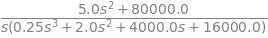

In [312]:
IL

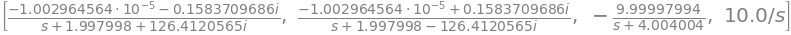

In [313]:
VC_frac = partFrac(VC,10).as_ordered_terms()
VC_frac

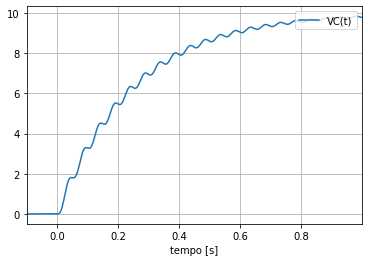

In [314]:
vc = 0
for i in range(len(VC_frac)):
    vc += invL(VC_frac[i],s,t)
vc = vc.simplify()
symplot(t,vc,bt,'VC(t)')

In [315]:
#Código relacionado as frações parciais 
#raizes 
def poli(p):
    n = 1
    for i in range(len(p)):
        n *= (s - p[i])
    return n
def coef(F):
    pNumerador = []
    pDenominador = []
    K = []
    numeradorCoef = sp.polys.polytools.Poly(F.as_numer_denom()[0]).all_coeffs()
    denominadorCoef = sp.polys.polytools.Poly(F.as_numer_denom()[1]).all_coeffs()
    sRaizesD = np.roots(denominadorCoef)
    sRaizesN = np.roots(numeradorCoef)
    numer = poli(sRaizesN)*numeradorCoef[0]
    denom = poli(sRaizesD)*denominadorCoef[0]
    for i in range(len(sRaizesD)):
        K.append(((numer*(s - sRaizesD[i])/denom).subs(s,sRaizesD[i]).simplify()))
    return sRaizesD,K
raizes, Ks = coef(IL)
for i in range(len(raizes)):
    print('S',i+1,' = ',raizes[len(raizes) - 1 - i])
print()
for i in range(len(Ks)):
    print('K',i+1,' = ',Ks[len(raizes)- 1 - i])

S 1  =  0j
S 2  =  (-4.004003999987972+0j)
S 3  =  (-1.997998000006021-126.41205646624056j)
S 4  =  (-1.997998000006021+126.41205646624056j)

K 1  =  5.00000000000000
K 2  =  -5.00499997492996
K 3  =  0.00249998746497767 - 0.00011885725337098*I
K 4  =  0.00249998746497767 + 0.00011885725337098*I


In [316]:
Ks[0]*2

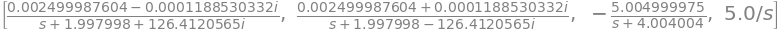

In [317]:
IL_frac = partFrac(IL,10).as_ordered_terms()
IL_frac

In [318]:
iL = (5 -5*sp.exp(-4*t) + sp.exp(-2*t)*(0.004999*sp.cos(126.41*t) - 0.00023771*sp.sin(126.41*t)))*sp.Heaviside(t)
iL

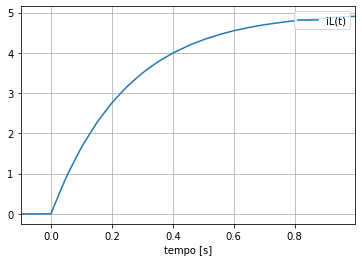

In [293]:
iL_py = 0
for i in range(len(IL_frac)):
    iL_py += invL(IL_frac[i],s,t)
iL_py = iL_py.simplify()
symplot(t,iL_py,bt,'iL(t)')

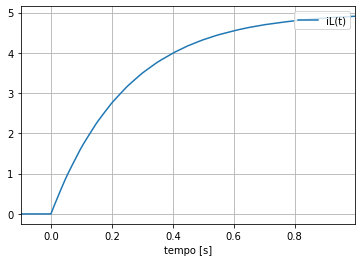

In [294]:
symplot(t,iL,bt,'iL(t)')

In [295]:
iL